In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea 

In [13]:
import cv2 as cv 

In [3]:
import os 
for dirname,_,filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
        break

dataset/seg_pred\seg_pred\10004.jpg
dataset/seg_test\seg_test\buildings\20057.jpg
dataset/seg_test\seg_test\forest\20056.jpg
dataset/seg_test\seg_test\glacier\20059.jpg
dataset/seg_test\seg_test\mountain\20058.jpg
dataset/seg_test\seg_test\sea\20072.jpg
dataset/seg_test\seg_test\street\20066.jpg
dataset/seg_train\seg_train\buildings\0.jpg
dataset/seg_train\seg_train\forest\10007.jpg
dataset/seg_train\seg_train\glacier\10.jpg
dataset/seg_train\seg_train\mountain\10000.jpg
dataset/seg_train\seg_train\sea\1.jpg
dataset/seg_train\seg_train\street\1000.jpg


In [4]:
dirname

'dataset/seg_train\\seg_train\\street'

In [6]:
os.walk('dataset/')

<generator object walk at 0x000001AAD15B9350>

In [8]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
base_model=VGG16( include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=[50,50,3],
    pooling=None,
    classes=1000,
    classifier_activation='softmax')

In [10]:
base_model.trainable=True
layers=10
    
for i in base_model.layers[:10]:
    base_model.trainable=False
pool=GlobalAveragePooling2D()
mid_layer=Dense(100,activation='softmax')
final_layer=Dense(6,activation='softmax')
model=Sequential([base_model,pool,mid_layer,final_layer])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 14,766,594
Trainable params: 51,906
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

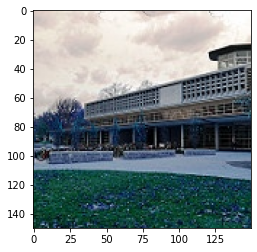

In [15]:
img=cv.imread('dataset/seg_train/seg_train/buildings/2193.jpg')

plt.imshow(img)
plt.show()

In [18]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.3)

train_data=train_gen.flow_from_directory('dataset/seg_train/seg_train/',target_size=(50,50),batch_size=32,
                                         class_mode='categorical',
                                        shuffle=True)

Found 14034 images belonging to 6 classes.


In [19]:
test_data=train_gen.flow_from_directory('dataset/seg_test/seg_test/',target_size=(50,50),batch_size=1,
                                       class_mode='categorical',shuffle=False)

Found 3000 images belonging to 6 classes.


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history=model.fit(train_data,epochs=2)

Epoch 1/2
439/439 [==============================] - 281s 620ms/step - loss: 1.4879 - accuracy: 0.5654
Epoch 2/2
439/439 [==============================] - 214s 486ms/step - loss: 1.1454 - accuracy: 0.6742


In [23]:
train_data.classes

array([0, 0, 0, ..., 5, 5, 5])

In [24]:
train_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [25]:
y_pred=model.predict(test_data).argmax(axis=1)

In [26]:
y_pred

array([0, 0, 0, ..., 4, 3, 0], dtype=int64)

In [28]:
img = cv.imread ('dataset/seg_test/seg_test/sea/20513.jpg')
img= cv.resize(img,(50,50))
img= img/255
img=img.reshape(-1,50,50,3)

np.round(model.predict(img)).argmax(axis = 1)

array([0], dtype=int64)

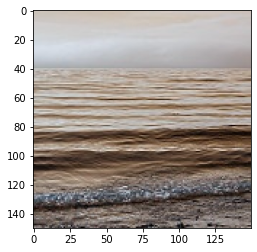

In [29]:
img =cv.imread('dataset/seg_test/seg_test/sea/20513.jpg')

plt.imshow(img)

In [30]:
test_data.classes

array([0, 0, 0, ..., 5, 5, 5])

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_pred,test_data.classes)

0.685

In [36]:
df_final=pd.DataFrame({'y_pred':y_pred,'y_real':test_data.classes})

In [38]:
df_final.head()

,y_pred,y_real
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [43]:
pred_img=train_gen.flow_from_directory('dataset/seg_pred/seg_pred/',target_size=(50,50),batch_size=1,
                                      shuffle=False)

Found 0 images belonging to 0 classes.
